In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb 

## Motivation and objective of project

We wanted to investigate how different factors such as the state of economy, health condition and more affect our physical and emotional wellbeing.

As mental health has been a rather important subject lately, we wanted to look at how we can make people more happy, and what areas we should look out for when trying to boost a country's happiness score. This is why we decided to model the happiness score, as we try to predict the happiness score of every country using other data points about the country.  

Using data science and machine learning tools to predict happiness score will allow us to pick out underlying trends present, and form a more robust understanding of happiness score which can be helpful in making the world a happier place.

In [2]:
# Combine data files into a single file
df_2015 = pd.read_csv("2015.csv")
df_2016 = pd.read_csv("2016.csv")
df_2017 = pd.read_csv("2017.csv")
df_2018 = pd.read_csv("2018.csv")
df_2019 = pd.read_csv("2019.csv")
df_2020 = pd.read_csv("2020.csv")
df_2021 = pd.read_csv("2021.csv")
df_2022 = pd.read_csv("2022.csv")

In [3]:
#view list of columns and shape of data frame 
print("Number of columns for year 2015")
print(df_2015.columns)
print(df_2015.shape)
print("Number of columns for year 2016")
print(df_2016.columns)
print(df_2016.shape)
print("Number of columns for year 2017")
print(df_2017.columns)
print(df_2017.shape)
print("Number of columns for year 2018")
print(df_2018.columns)
print(df_2018.shape)
print("Number of columns for year 2019")
print(df_2019.columns)
print(df_2019.shape)
print("Number of columns for year 2020")
print(df_2020.columns)
print(df_2020.shape)
print("Number of columns for year 2021")
print(df_2021.columns)
print(df_2021.shape)
print("Number of columns for year 2022")
print(df_2022.columns)
print(df_2022.shape)

Number of columns for year 2015
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
(158, 12)
Number of columns for year 2016
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')
(157, 13)
Number of columns for year 2017
Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')
(155, 12)
Number o

## Data cleaning:

1. Adding extra coloumn (Year) to indicate when the data (corresponding indexes) was collected
2. Identify common columns between all 8 years.  
**[Country, Happiness Rank, Happiness Score, Economy, Family, Health,	Freedom, Generosity, Trust, Dystopia Residual]**  
This variables are identified through analysing meaning of variables' names and values.  
Rebase variables to allow for comparison. (eg. *Dystopia Residual = 1.85 + Freedom*)
3. Rename same data variables in different years that initially had different names.
4. Drop unnecessary columns to allow for efficient and effective visualization and comparison
5. Print the resulting data sets to check whether data is cleaned properly
6. Ensure that there are no null values for all data

In [4]:
# Re-ORDER the columns in dataset 
order = ['Country', 'Happiness Rank', 'Happiness Score', 'Economy', 'Family','Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual', 'Year']

In [5]:
df_2015 = df_2015.drop(['Region','Standard Error'], axis=1)
df_2015['Year'] = 2015
df_2015.rename(columns={"Economy (GDP per Capita)":"Economy", "Health (Life Expectancy)":"Health", "Trust (Government Corruption)":"Trust"}, inplace=True)
df_2015.head()

Country  Happiness Rank  Happiness Score  Economy   Family   Health  \
0  Switzerland               1            7.587  1.39651  1.34951  0.94143   
1      Iceland               2            7.561  1.30232  1.40223  0.94784   
2      Denmark               3            7.527  1.32548  1.36058  0.87464   
3       Norway               4            7.522  1.45900  1.33095  0.88521   
4       Canada               5            7.427  1.32629  1.32261  0.90563   

   Freedom    Trust  Generosity  Dystopia Residual  Year  
0  0.66557  0.41978     0.29678            2.51738  2015  
1  0.62877  0.14145     0.43630            2.70201  2015  
2  0.64938  0.48357     0.34139            2.49204  2015  
3  0.66973  0.36503     0.34699            2.46531  2015  
4  0.63297  0.32957     0.45811            2.45176  2015

In [6]:
df_2016 = df_2016.drop(['Region','Lower Confidence Interval','Upper Confidence Interval'], axis=1)
df_2016['Year'] = 2016
df_2016.rename(columns={"Economy (GDP per Capita)":"Economy", "Health (Life Expectancy)":"Health", "Trust (Government Corruption)":"Trust"}, inplace=True)
df_2016 = df_2016.reindex(columns=order)

df_2016.head()

Country  Happiness Rank  Happiness Score  Economy   Family   Health  \
0      Denmark               1            7.526  1.44178  1.16374  0.79504   
1  Switzerland               2            7.509  1.52733  1.14524  0.86303   
2      Iceland               3            7.501  1.42666  1.18326  0.86733   
3       Norway               4            7.498  1.57744  1.12690  0.79579   
4      Finland               5            7.413  1.40598  1.13464  0.81091   

   Freedom    Trust  Generosity  Dystopia Residual  Year  
0  0.57941  0.44453     0.36171            2.73939  2016  
1  0.58557  0.41203     0.28083            2.69463  2016  
2  0.56624  0.14975     0.47678            2.83137  2016  
3  0.59609  0.35776     0.37895            2.66465  2016  
4  0.57104  0.41004     0.25492            2.82596  2016

In [7]:
df_2017 = df_2017.drop(['Whisker.high','Whisker.low'], axis=1)
df_2017['Year'] = 2017
df_2017.rename(columns={"Happiness.Rank":"Happiness Rank", "Happiness.Score":"Happiness Score", "Economy..GDP.per.Capita.":"Economy", "Health..Life.Expectancy.":"Health", "Trust..Government.Corruption.":"Trust", "Dystopia.Residual":"Dystopia Residual"}, inplace=True)
df_2017 = df_2017.reindex(columns=order)
df_2017.head()

Country  Happiness Rank  Happiness Score   Economy    Family    Health  \
0       Norway               1            7.537  1.616463  1.533524  0.796667   
1      Denmark               2            7.522  1.482383  1.551122  0.792566   
2      Iceland               3            7.504  1.480633  1.610574  0.833552   
3  Switzerland               4            7.494  1.564980  1.516912  0.858131   
4      Finland               5            7.469  1.443572  1.540247  0.809158   

    Freedom     Trust  Generosity  Dystopia Residual  Year  
0  0.635423  0.315964    0.362012           2.277027  2017  
1  0.626007  0.400770    0.355280           2.313707  2017  
2  0.627163  0.153527    0.475540           2.322715  2017  
3  0.620071  0.367007    0.290549           2.276716  2017  
4  0.617951  0.382612    0.245483           2.430182  2017

In [8]:
df_2018 = df_2018.rename(columns={"Overall rank":"Happiness Rank", "Country or region":"Country", "Score":"Happiness Score", "GDP per capita":"Economy", "Social support":"Family", "Healthy life expectancy":"Health", "Freedom to make life choices":"Freedom", "Perceptions of corruption":"Trust"})
df_2018['Dystopia Residual'] = 1.85+df_2018['Freedom']
df_2018['Year'] = 2018
df_2018 = df_2018.reindex(columns=order)
df_2018.head()

Country  Happiness Rank  Happiness Score  Economy  Family  Health  \
0      Finland               1            7.632    1.305   1.592   0.874   
1       Norway               2            7.594    1.456   1.582   0.861   
2      Denmark               3            7.555    1.351   1.590   0.868   
3      Iceland               4            7.495    1.343   1.644   0.914   
4  Switzerland               5            7.487    1.420   1.549   0.927   

   Freedom  Trust  Generosity  Dystopia Residual  Year  
0    0.681  0.393       0.202              2.531  2018  
1    0.686  0.340       0.286              2.536  2018  
2    0.683  0.408       0.284              2.533  2018  
3    0.677  0.138       0.353              2.527  2018  
4    0.660  0.357       0.256              2.510  2018

In [9]:
df_2019 = df_2019.rename(columns={"Overall rank":"Happiness Rank", "Country or region":"Country", "Score":"Happiness Score", "GDP per capita":"Economy", "Social support":"Family", "Healthy life expectancy":"Health", "Freedom to make life choices":"Freedom", "Perceptions of corruption":"Trust"})
df_2019['Dystopia Residual'] = 1.85+df_2019['Freedom']
df_2019['Year'] = 2019
df_2019 = df_2019.reindex(columns=order)

df_2019.head()

Country  Happiness Rank  Happiness Score  Economy  Family  Health  \
0      Finland               1            7.769    1.340   1.587   0.986   
1      Denmark               2            7.600    1.383   1.573   0.996   
2       Norway               3            7.554    1.488   1.582   1.028   
3      Iceland               4            7.494    1.380   1.624   1.026   
4  Netherlands               5            7.488    1.396   1.522   0.999   

   Freedom  Trust  Generosity  Dystopia Residual  Year  
0    0.596  0.393       0.153              2.446  2019  
1    0.592  0.410       0.252              2.442  2019  
2    0.603  0.341       0.271              2.453  2019  
3    0.591  0.118       0.354              2.441  2019  
4    0.557  0.298       0.322              2.407  2019

In [10]:
df_2020 = df_2020.drop(['Regional indicator','Standard error of ladder score','upperwhisker','lowerwhisker','Logged GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption','Ladder score in Dystopia'], axis=1)
df_2020['Year'] = 2020
df_2020.rename(columns={"Country name":"Country","Ranking":"Happiness Rank", "Ladder score":"Happiness Score", "Explained by: Log GDP per capita":"Economy", "Explained by: Healthy life expectancy":"Health", "Explained by: Perceptions of corruption":"Trust", "Dystopia + residual":"Dystopia Residual","Explained by: Social support":"Family","Explained by: Generosity":"Generosity", "Explained by: Freedom to make life choices": "Freedom"}, inplace=True)
df_2020 = df_2020.reindex(columns=order)
df_2020.head()

Country  Happiness Rank  Happiness Score   Economy    Family    Health  \
0      Finland               1           7.8087  1.285190  1.499526  0.961271   
1      Denmark               2           7.6456  1.326949  1.503449  0.979333   
2  Switzerland               3           7.5599  1.390774  1.472403  1.040533   
3      Iceland               4           7.5045  1.326502  1.547567  1.000843   
4       Norway               5           7.4880  1.424207  1.495173  1.008072   

    Freedom     Trust  Generosity  Dystopia Residual  Year  
0  0.662317  0.477857    0.159670           2.762835  2020  
1  0.665040  0.495260    0.242793           2.432741  2020  
2  0.628954  0.407946    0.269056           2.350267  2020  
3  0.661981  0.144541    0.362330           2.460688  2020  
4  0.670201  0.434101    0.287985           2.168266  2020

In [11]:
df_2021 = df_2021.drop(['Regional indicator', 'Standard error of ladder score', 'upperwhisker','lowerwhisker', 'Logged GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption','Ladder score in Dystopia'], axis=1)
df_2021 = df_2021.rename(columns={"Rank":"Happiness Rank","Country name":"Country", "Ladder score":"Happiness Score", "Explained by: Log GDP per capita":"Economy", "Explained by: Social support":"Family", "Explained by: Healthy life expectancy":"Health", "Explained by: Freedom to make life choices":"Freedom","Explained by: Generosity":"Generosity", "Explained by: Perceptions of corruption":"Trust", "Dystopia + residual":"Dystopia Residual" })
df_2021['Year'] = 2021
df_2021 = df_2021.reindex(columns=order)
df_2021.head()

Country  Happiness Rank  Happiness Score  Economy  Family  Health  \
0      Finland               1            7.842    1.446   1.106   0.741   
1      Denmark               2            7.620    1.502   1.108   0.763   
2  Switzerland               3            7.571    1.566   1.079   0.816   
3      Iceland               4            7.554    1.482   1.172   0.772   
4  Netherlands               5            7.464    1.501   1.079   0.753   

   Freedom  Trust  Generosity  Dystopia Residual  Year  
0    0.691  0.481       0.124              3.253  2021  
1    0.686  0.485       0.208              2.868  2021  
2    0.653  0.413       0.204              2.839  2021  
3    0.698  0.170       0.293              2.967  2021  
4    0.647  0.384       0.302              2.798  2021

In [12]:
df_2022 = df_2022.drop(['Whisker-high','Whisker-low'], axis=1)
df_2022['Year'] = 2022
df_2022 = df_2022.rename(columns={"RANK":"Happiness Rank","Happiness score":"Happiness Score","Explained by: GDP per capita":"Economy", "Explained by: Social support":"Family", "Explained by: Healthy life expectancy":"Health", "Explained by: Freedom to make life choices":"Freedom","Explained by: Generosity":"Generosity", "Explained by: Perceptions of corruption":"Trust", "Dystopia (1.83) + residual":"Dystopia Residual" })
df_2022 = df_2022.reindex(columns=order)
df_2022.head()

Country  Happiness Rank  Happiness Score  Economy  Family  Health  \
0      Finland               1            7.821    1.892   1.258   0.775   
1      Denmark               2            7.636    1.953   1.243   0.777   
2      Iceland               3            7.557    1.936   1.320   0.803   
3  Switzerland               4            7.512    2.026   1.226   0.822   
4  Netherlands               5            7.415    1.945   1.206   0.787   

   Freedom  Trust  Generosity  Dystopia Residual  Year  
0    0.736  0.534       0.109              2.518  2022  
1    0.719  0.532       0.188              2.226  2022  
2    0.718  0.191       0.270              2.320  2022  
3    0.677  0.461       0.147              2.153  2022  
4    0.651  0.419       0.271              2.137  2022

In [13]:
csv_files = [df_2015,df_2016,df_2017,df_2018,df_2019,df_2020,df_2021,df_2022]
#print(csv_files)

df_files = pd.concat([df_2015,df_2016,df_2017,df_2018,df_2019,df_2020,df_2021,df_2022])
df_files

Country  Happiness Rank  Happiness Score  Economy   Family   Health  \
0    Switzerland               1            7.587  1.39651  1.34951  0.94143   
1        Iceland               2            7.561  1.30232  1.40223  0.94784   
2        Denmark               3            7.527  1.32548  1.36058  0.87464   
3         Norway               4            7.522  1.45900  1.33095  0.88521   
4         Canada               5            7.427  1.32629  1.32261  0.90563   
..           ...             ...              ...      ...      ...      ...   
141    Botswana*             142            3.471  1.50300  0.81500  0.28000   
142      Rwanda*             143            3.268  0.78500  0.13300  0.46200   
143     Zimbabwe             144            2.995  0.94700  0.69000  0.27000   
144      Lebanon             145            2.955  1.39200  0.49800  0.63100   
145  Afghanistan             146            2.404  0.75800  0.00000  0.28900   

     Freedom    Trust  Generosity  Dystopia Residual  Year  
0    0.66557  0.41978     0.29678            2.51738  2015  
1    0.62877  0.14145     0.43630            2.70201  2015  
2    0.64938  0.48357     0.34139            2.49204  2015  
3    0.66973  0.36503     0.34699            2.46531  2015  
4    0.63297  0.32957     0.45811            2.45176  2015  
..       ...      ...         ...                ...   ...  
141  0.57100  0.10200     0.01200            0.18700  2022  
142  0.62100  0.54400     0.18700            0.53600  2022  
143  0.32900  0.10500     0.10600            0.54800  2022  
144  0.10300  0.03400     0.08200            0.21600  2022  
145  0.00000  0.00500     0.08900            1.26300  2022  

[1230 rows x 11 columns]

In [14]:
df_files.shape

(1230, 11)

In [15]:
df_files.dtypes

Country               object
Happiness Rank         int64
Happiness Score      float64
Economy              float64
Family               float64
Health               float64
Freedom              float64
Trust                float64
Generosity           float64
Dystopia Residual    float64
Year                   int64
dtype: object

In [16]:
#Checking for null values
df_files.isnull().sum()

Country              0
Happiness Rank       0
Happiness Score      0
Economy              0
Family               0
Health               0
Freedom              0
Trust                1
Generosity           0
Dystopia Residual    0
Year                 0
dtype: int64

In [17]:
df_files = df_files.dropna()
df_files.shape

(1229, 11)

## Exploratory Analysis:

1. **Pairplot** to visualise how the variables relate to one another  
Please ensure that the version of seaborn is at 0.12.2 to see the plot
2. **Heatmap** of correlation matrix to see r-value for each of the variables against happiness score
3. Zoom into **individual graphs**, which are relevant to our project, of the pairplot and find the r^2 values accordingly
4. **Choropleth** map to see how the happiness score varies across the globe. Perhaps pick out interesting geographical trends present.

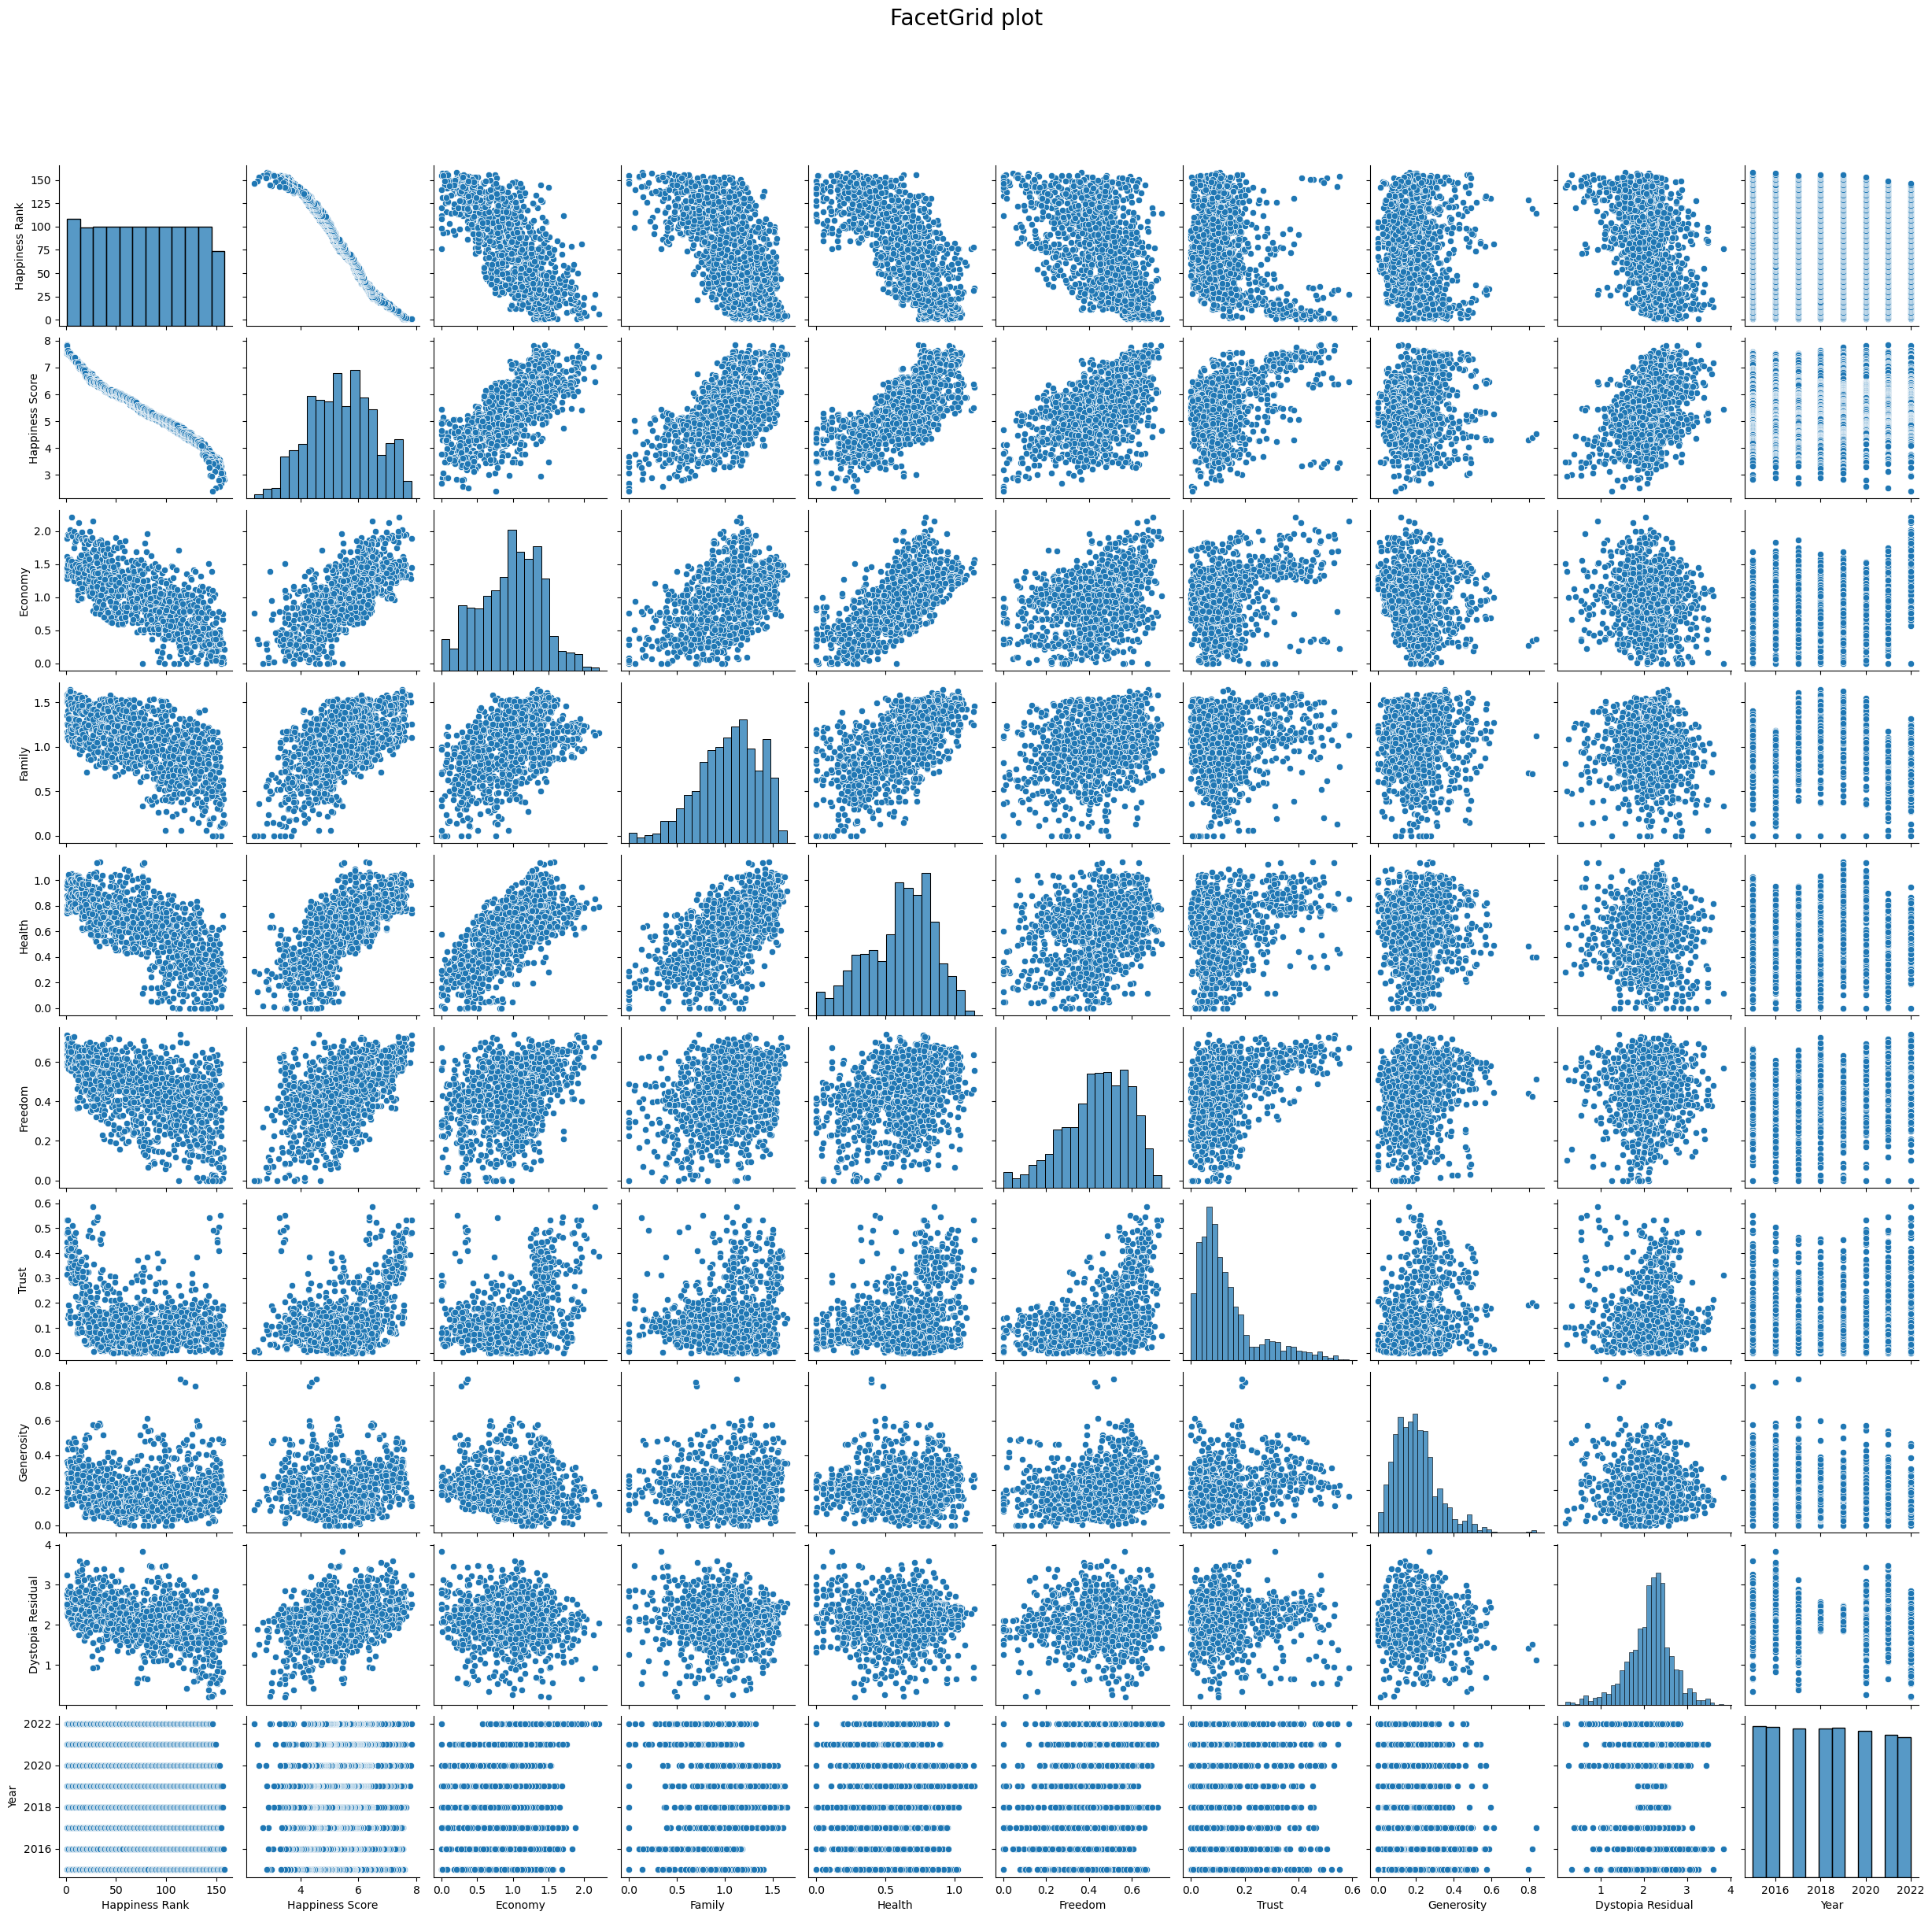

In [18]:
#FacetGrid plot
gdata = sb.pairplot(df_files)
gdata.fig.suptitle('FacetGrid plot', fontsize = 20)
gdata.fig.subplots_adjust(top= 0.9)

                 Happiness Score   Economy    Family    Health   Freedom  \
Happiness Score         1.000000  0.742438  0.629771  0.727904  0.566554   
Economy                 0.742438  1.000000  0.493423  0.705941  0.408341   
Family                  0.629771  0.493423  1.000000  0.622583  0.331743   
Health                  0.727904  0.705941  0.622583  1.000000  0.335920   
Freedom                 0.566554  0.408341  0.331743  0.335920  1.000000   
Trust                   0.407241  0.329331  0.127802  0.274839  0.441157   
Generosity              0.091440 -0.117928  0.007587 -0.010325  0.191387   

                    Trust  Generosity  
Happiness Score  0.407241    0.091440  
Economy          0.329331   -0.117928  
Family           0.127802    0.007587  
Health           0.274839   -0.010325  
Freedom          0.441157    0.191387  
Trust            1.000000    0.244566  
Generosity       0.244566    1.000000  


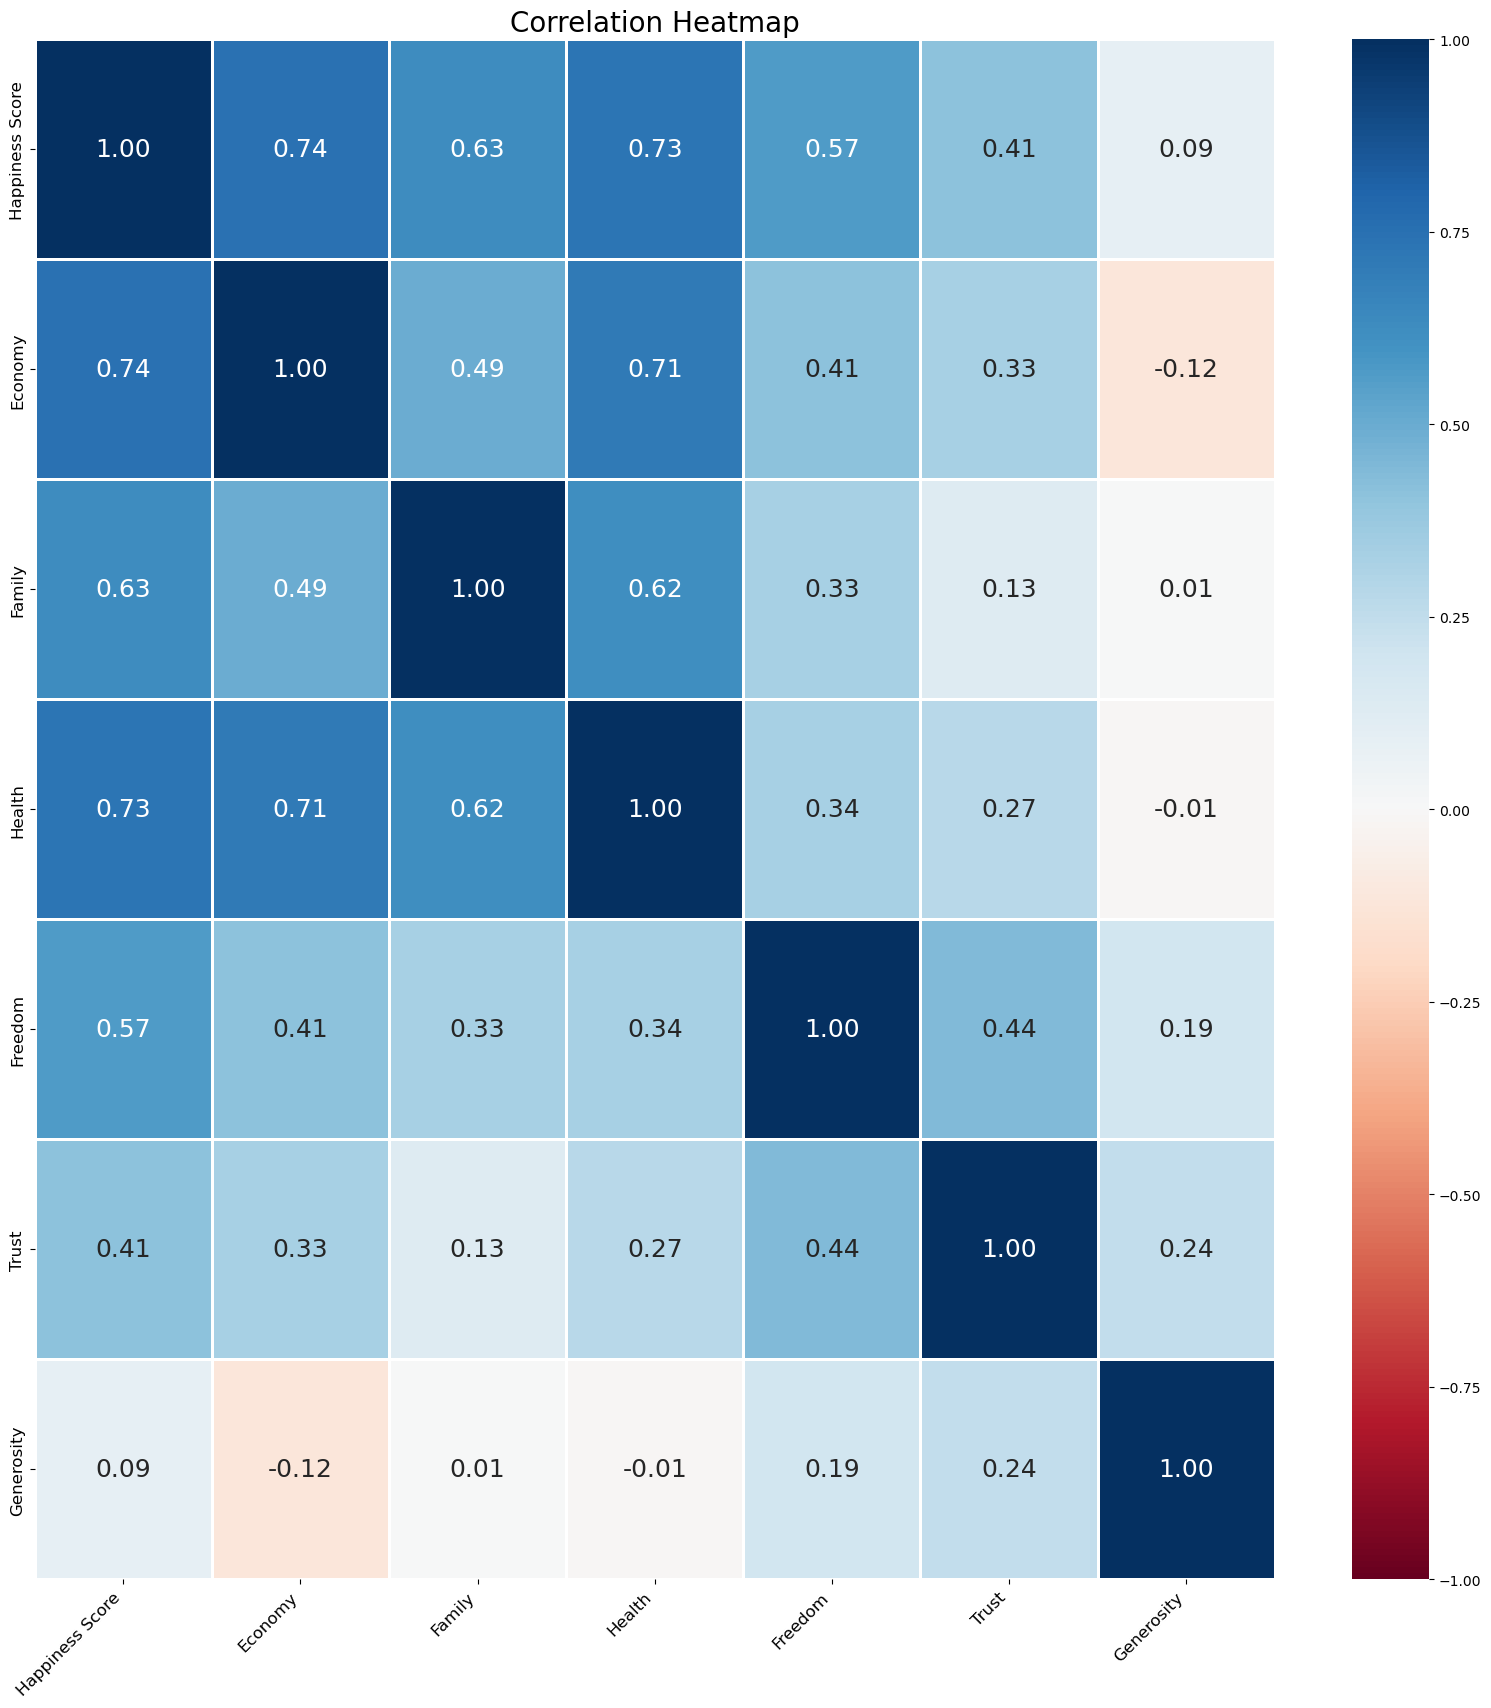

In [19]:
df_filesData = pd.DataFrame(df_files[["Happiness Score", "Economy", "Family","Health", "Freedom", "Trust", "Generosity"]])

#correlation heatmap

# Correlation Matrix
print(df_filesData.corr())

# Heatmap of the Correlation Matrix
fig = plt.figure(figsize=(20, 20))
ax = sb.heatmap(df_filesData.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

ax.set_title ("Correlation Heatmap", fontsize = 20)


ax.set_yticklabels (ax.get_yticklabels(), fontsize = 12)

ax.set_xticklabels (ax.get_xticklabels(),rotation = 45,horizontalalignment = "right",fontsize = 12)
plt.show()

In [20]:
#Correlation between Happiness score and economic
econ_happ = ['Happiness Score','Economy']
econ_corr = df_files[econ_happ]
econ_corr.corr()

Happiness Score   Economy
Happiness Score         1.000000  0.742438
Economy                 0.742438  1.000000

In [21]:
# Calculating coefficient of determination to check accuracy of model
econ_r2 = 0.742438**2
print(econ_r2)

0.5512141838440001


Text(0.5, 1.0, 'Correlation graph for Happiness score vs Economy')

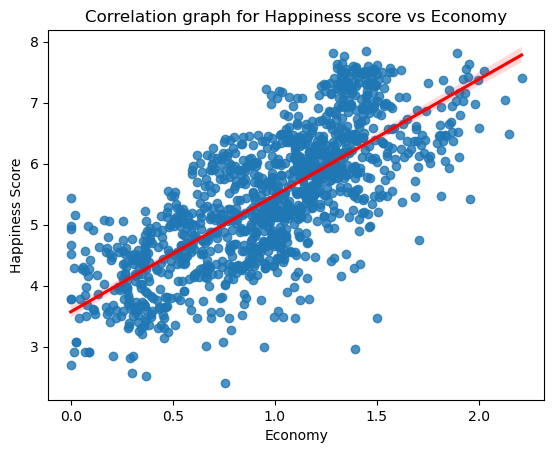

In [22]:
sb.regplot(data = econ_corr, x = 'Economy', y = 'Happiness Score', line_kws={"color": "red"}).set_title("Correlation graph for Happiness score vs Economy")

In [23]:
#Correlation between Happiness score and Family
fam_happ = ["Happiness Score", "Family"]
fam_corr = df_files[fam_happ]
fam_corr.corr()

Happiness Score    Family
Happiness Score         1.000000  0.629771
Family                  0.629771  1.000000

In [24]:
fam_cor_r2 = 0.629771**2
print(fam_cor_r2)

0.39661151244099996


Text(0.5, 1.0, 'Correlation graph for Happiness score vs Family')

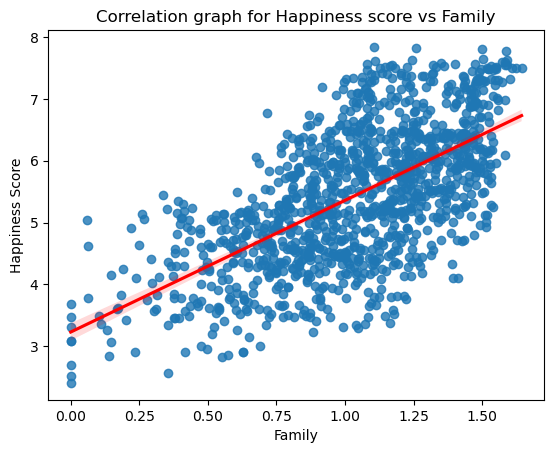

In [25]:
sb.regplot(data=fam_corr, x = 'Family', y = 'Happiness Score', line_kws={"color": "red"}).set_title("Correlation graph for Happiness score vs Family")


In [26]:
#Correlation between Happiness score and Health
hea_happ = ["Happiness Score", "Health"]
hea_corr = df_files[hea_happ]
hea_corr.corr()

Happiness Score    Health
Happiness Score         1.000000  0.727904
Health                  0.727904  1.000000

In [27]:
hea_corr_r2 = 0.727904**2
print(hea_corr_r2)

0.5298442332159999


Text(0.5, 1.0, 'Correlation graph for Happiness score vs Health')

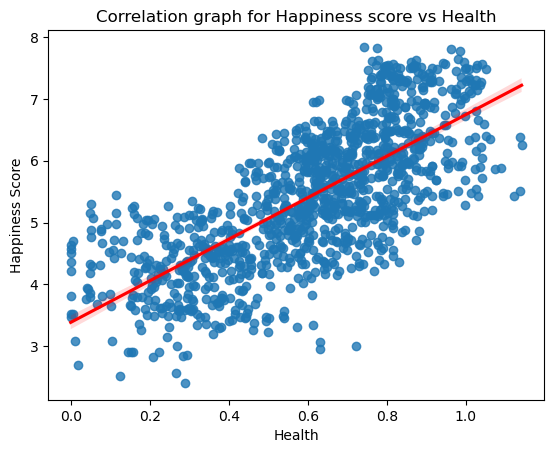

In [28]:
sb.regplot(data=hea_corr, x = 'Health', y = 'Happiness Score', line_kws={"color": "red"}).set_title("Correlation graph for Happiness score vs Health")


In [29]:
#Correlation between Happiness score and Freedom
free_happ = ["Happiness Score", "Freedom"]
free_corr = df_files[free_happ]
free_corr.corr()

Happiness Score   Freedom
Happiness Score         1.000000  0.566554
Freedom                 0.566554  1.000000

In [30]:
free_corr_r2 = 0.566554**2
print(free_corr_r2)

0.320983434916


Text(0.5, 1.0, 'Correlation graph for Happiness score vs Freedom')

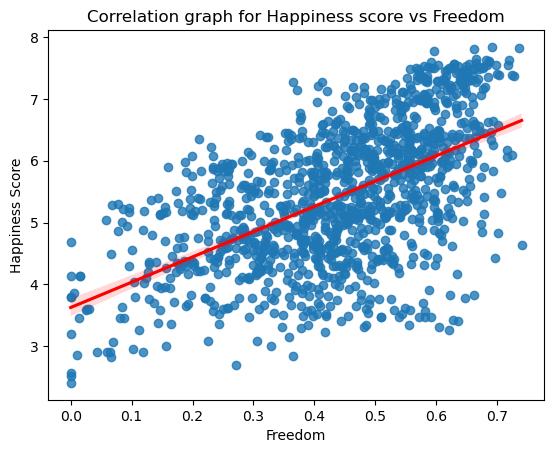

In [31]:
sb.regplot(data=free_corr, x = 'Freedom', y = 'Happiness Score', line_kws={"color": "red"}).set_title("Correlation graph for Happiness score vs Freedom")


In [32]:
#Correlation between Happiness score and Government Corruption(Trust)
trust_happ = ["Happiness Score", "Trust"]
trust_corr = df_files[trust_happ]
trust_corr.corr()

Happiness Score     Trust
Happiness Score         1.000000  0.407241
Trust                   0.407241  1.000000

In [33]:
trust_corr_r2 = 0.407241**2
print(trust_corr_r2)

0.16584523208100002


Text(0.5, 1.0, 'Correlation graph for Happiness score vs Trust')

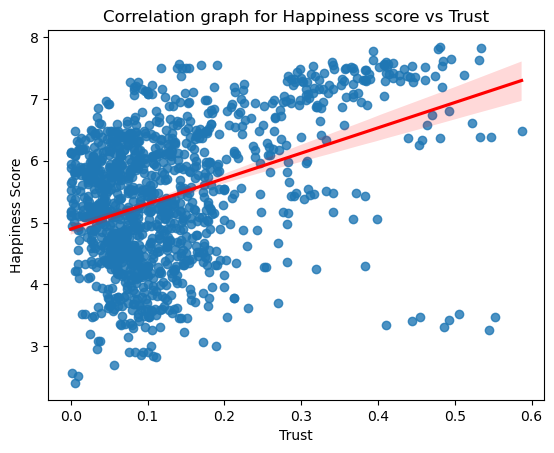

In [34]:
sb.regplot(data=trust_corr, x = 'Trust', y = 'Happiness Score', line_kws={"color": "red"}).set_title("Correlation graph for Happiness score vs Trust")


In [35]:
#Correlation between Happiness score and Generosity
gen_happ = ["Happiness Score", "Generosity"]
gen_corr = df_files[gen_happ]
gen_corr.corr()

Happiness Score  Generosity
Happiness Score          1.00000     0.09144
Generosity               0.09144     1.00000

In [36]:
gen_corr_r2 = 0.09144**2
print(gen_corr_r2)

0.008361273599999998


Text(0.5, 1.0, 'Correlation graph for Happiness score vs Generosity')

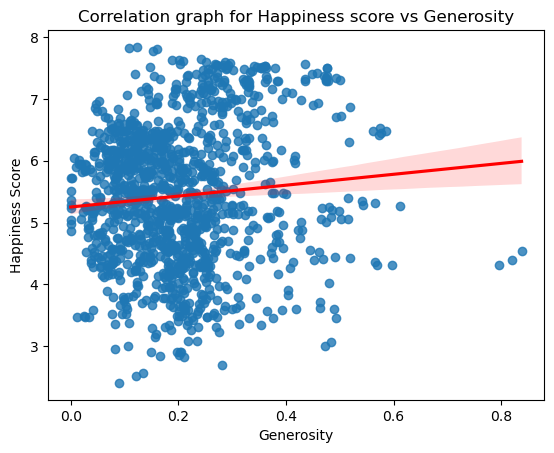

In [37]:
sb.regplot(data=gen_corr, x = 'Generosity', y = 'Happiness Score', line_kws={"color": "red"}).set_title("Correlation graph for Happiness score vs Generosity")


In [38]:
#Correlation between Happiness score and Dystopia residual
dys_happ = ["Happiness Score", "Dystopia Residual"]
dys_corr = df_files[dys_happ]
dys_corr.corr()


Happiness Score  Dystopia Residual
Happiness Score           1.000000           0.430294
Dystopia Residual         0.430294           1.000000

In [39]:
dys_corr_r2 = 0.430294**2
print(dys_corr_r2)

0.185152926436


Text(0.5, 1.0, 'Correlation graph for Happiness score vs Dystopia Residual')

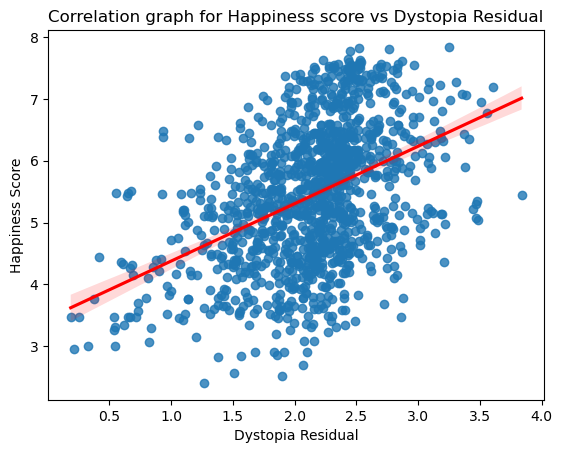

In [40]:
sb.regplot(data=dys_corr, x = 'Dystopia Residual', y = 'Happiness Score', line_kws={"color": "red"}).set_title("Correlation graph for Happiness score vs Dystopia Residual")

In [41]:
attributes = ["Economy", "Health", "Family", "Freedom", "Dystopia Residual", "Trust", "Generosity"]
r_value = [0.742438, 0.727904, 0.629771, 0.566554, 0.430294, 0.407241, 0.09144]
r2_value = [0.5512141838440001, 0.5298442332159999, 0.39661151244099996, 0.320983434916, 0.185152926436, 0.16584523208100002, 0.00836127360]
data = pd.DataFrame({'Attributes': attributes, 'R Value': r_value, 'R2 Value': r2_value})
data.head()

Attributes   R Value  R2 Value
0            Economy  0.742438  0.551214
1             Health  0.727904  0.529844
2             Family  0.629771  0.396612
3            Freedom  0.566554  0.320983
4  Dystopia Residual  0.430294  0.185153

<Axes: xlabel='R Value', ylabel='Attributes'>

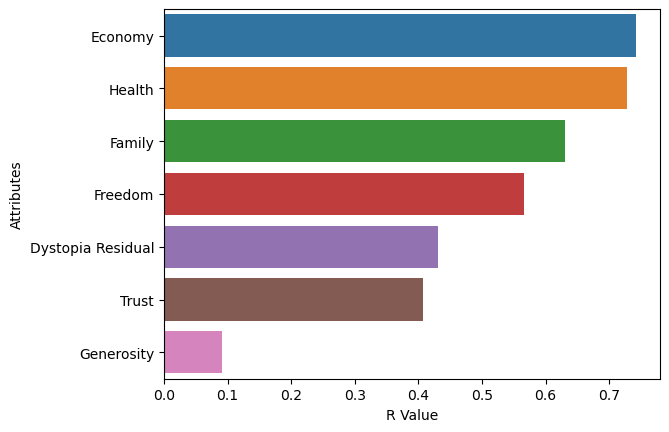

In [42]:
sb.barplot(data=data, y="Attributes", x="R Value")

<Axes: xlabel='R2 Value', ylabel='Attributes'>

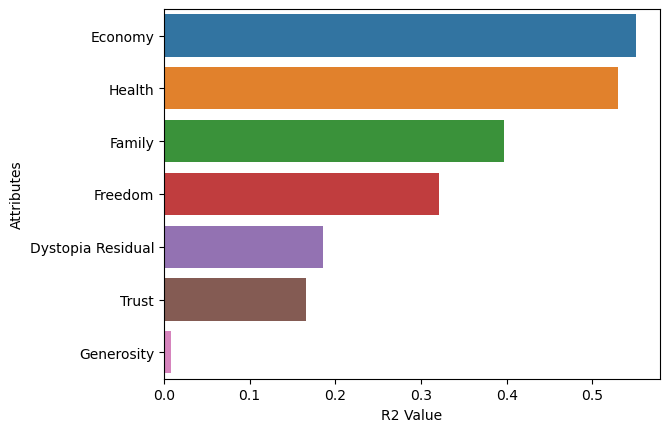

In [43]:
sb.barplot(data=data, y="Attributes", x="R2 Value")

Looking at the bar plots, you can pick out the top four variables with a high correlation cofficient of around 0.6 are **[Economy, Health, Family, Freedom]**  
This would be important later as we need to choose the variables sensibly for our model.  
Because we have decided to use linear regression model as the baseline for comparison, the variables need to have a relatively high correlation to happiness score such that the model is **meaningful and accurate**  
The subsequent model, the random forest regression would take in the same input values to see whether it manages to improve the accuracy of the model.

In [44]:
import plotly.graph_objs as go
from plotly.offline import iplot

map_happy = dict(type = 'choropleth', 
           locations = df_files['Country'],
           locationmode = 'country names',
           z = df_files['Happiness Score'], 
           text = df_files['Country'],
           colorbar = {'title':'Happiness Score'},
           colorscale = 'Viridis')

layout = dict(title = 'Average Happiness Score Across The World over 8 years', 
              geo = dict(showframe = False, projection = {'type': 'equirectangular'}))

choromap3 = go.Figure(data = [map_happy], layout=layout)
iplot(choromap3)

## Something extra

We used a choropleth map to visualise average happiness score across 8 years according to location.  
We can see that the Scandinavian countries (Finland, Sweden, Normay, Denmark, etc... ) tend to be the happiest, a sharp colour change as we shift from this nordic countries to western Europe. Perhaps there may be something about the culture/physical geographic location of this places that makes the countries more happy  
Canada, US, Australia are also noted to have a higher average happiness score  
Sadly for our project, we did not delve into the geography relationship which may have been interesting. We focused instead on numerical variables to predict for happiness, though it was interesting so we decided to leave this part here.

Intercept of Regression 	: b =  [2.27820627]
Coefficients of Regression 	: a =  [[0.86786118 1.26897224 0.70457097 1.81927092]]

  Predictors  Coefficients
0    Economy      0.867861
1     Health      1.268972
2     Family      0.704571
3    Freedom      1.819271



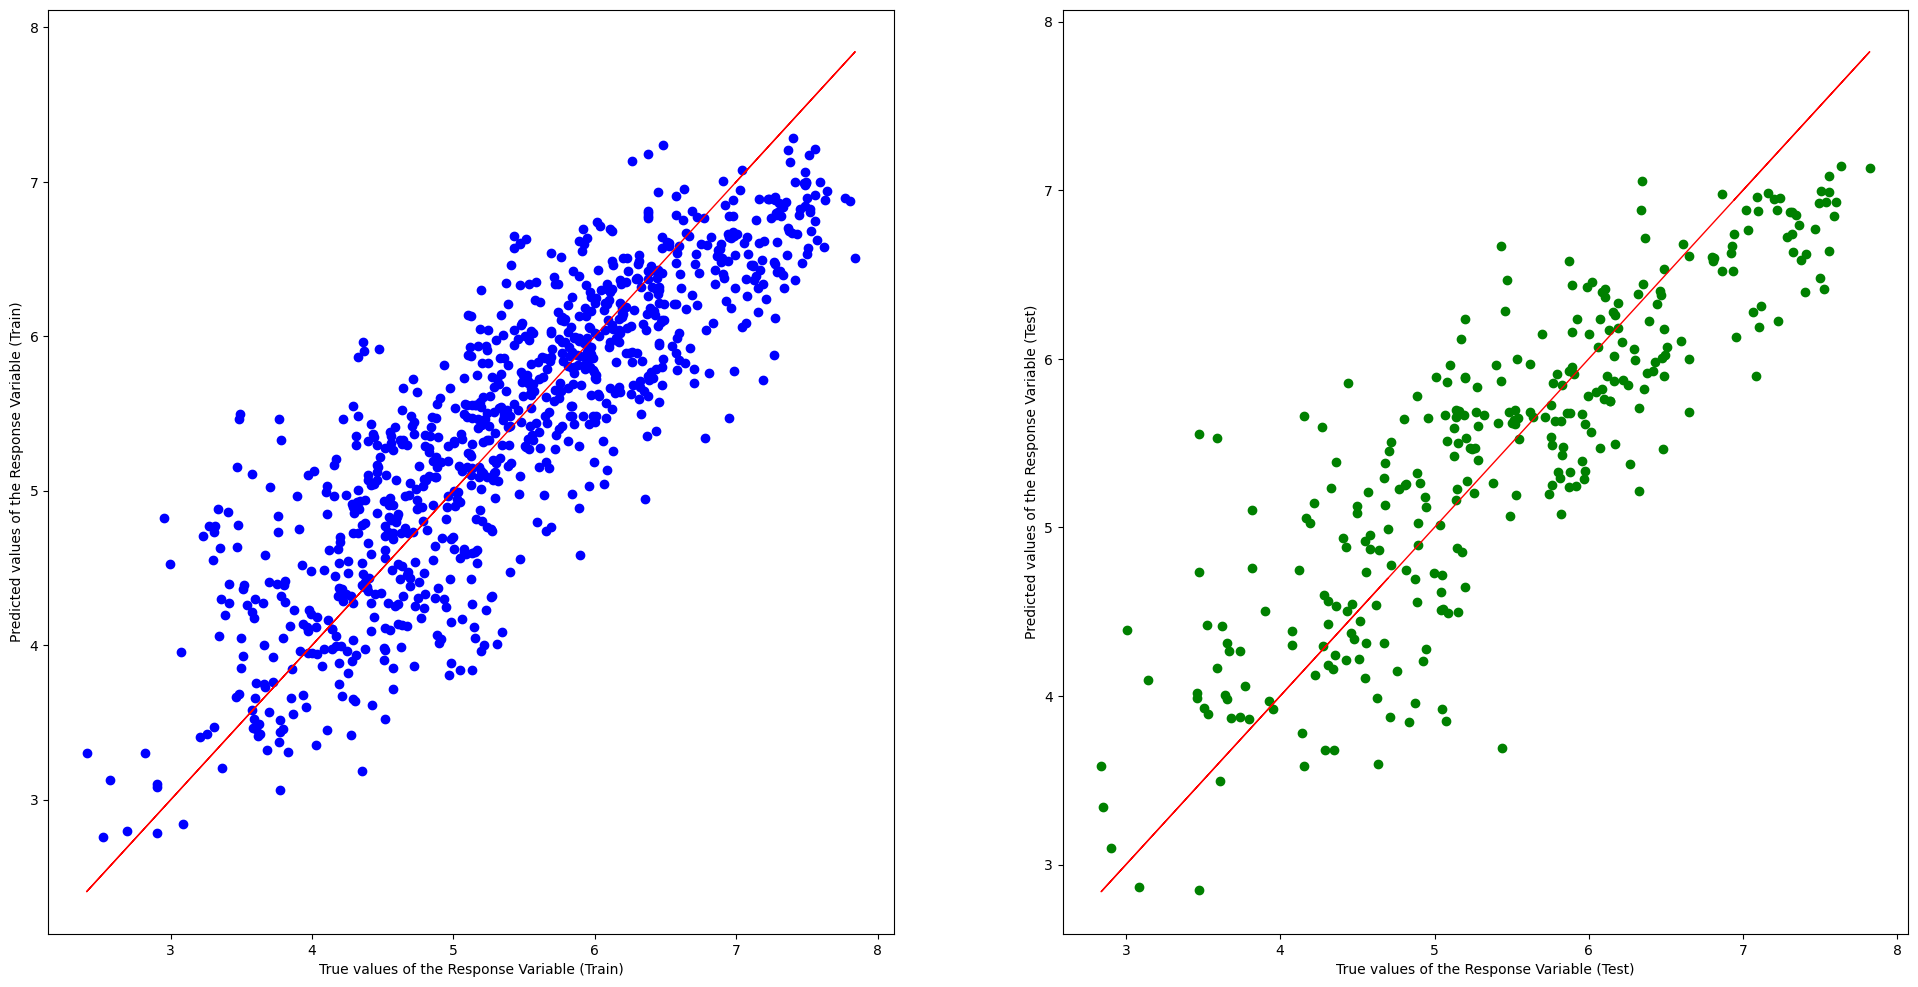

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.727309137668029
Mean Squared Error (MSE) 	: 0.336691589098405

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7390388760928357
Mean Squared Error (MSE) 	: 0.33000049918050917



In [45]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
y = pd.DataFrame(df_files["Happiness Score"])
X = pd.DataFrame(df_files[["Economy", "Health", "Family", "Freedom"]])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train.to_numpy(), y_train.to_numpy(), 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test.to_numpy(), y_test.to_numpy(), 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

## Results of linear regression model

Initial results of this model seems promising as it has achieved a explained variance of 0.716 on the test data set and a MSE of 0.339.  
Theorectically, the best model would have the points lie on the y = x axis with zero error, and since our model approaches the ideal model quite well we wanted to see whether we can improve the model.  
One such way is to change the model entirely, thus we chose to use Random Forest Regression subsequently.

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}


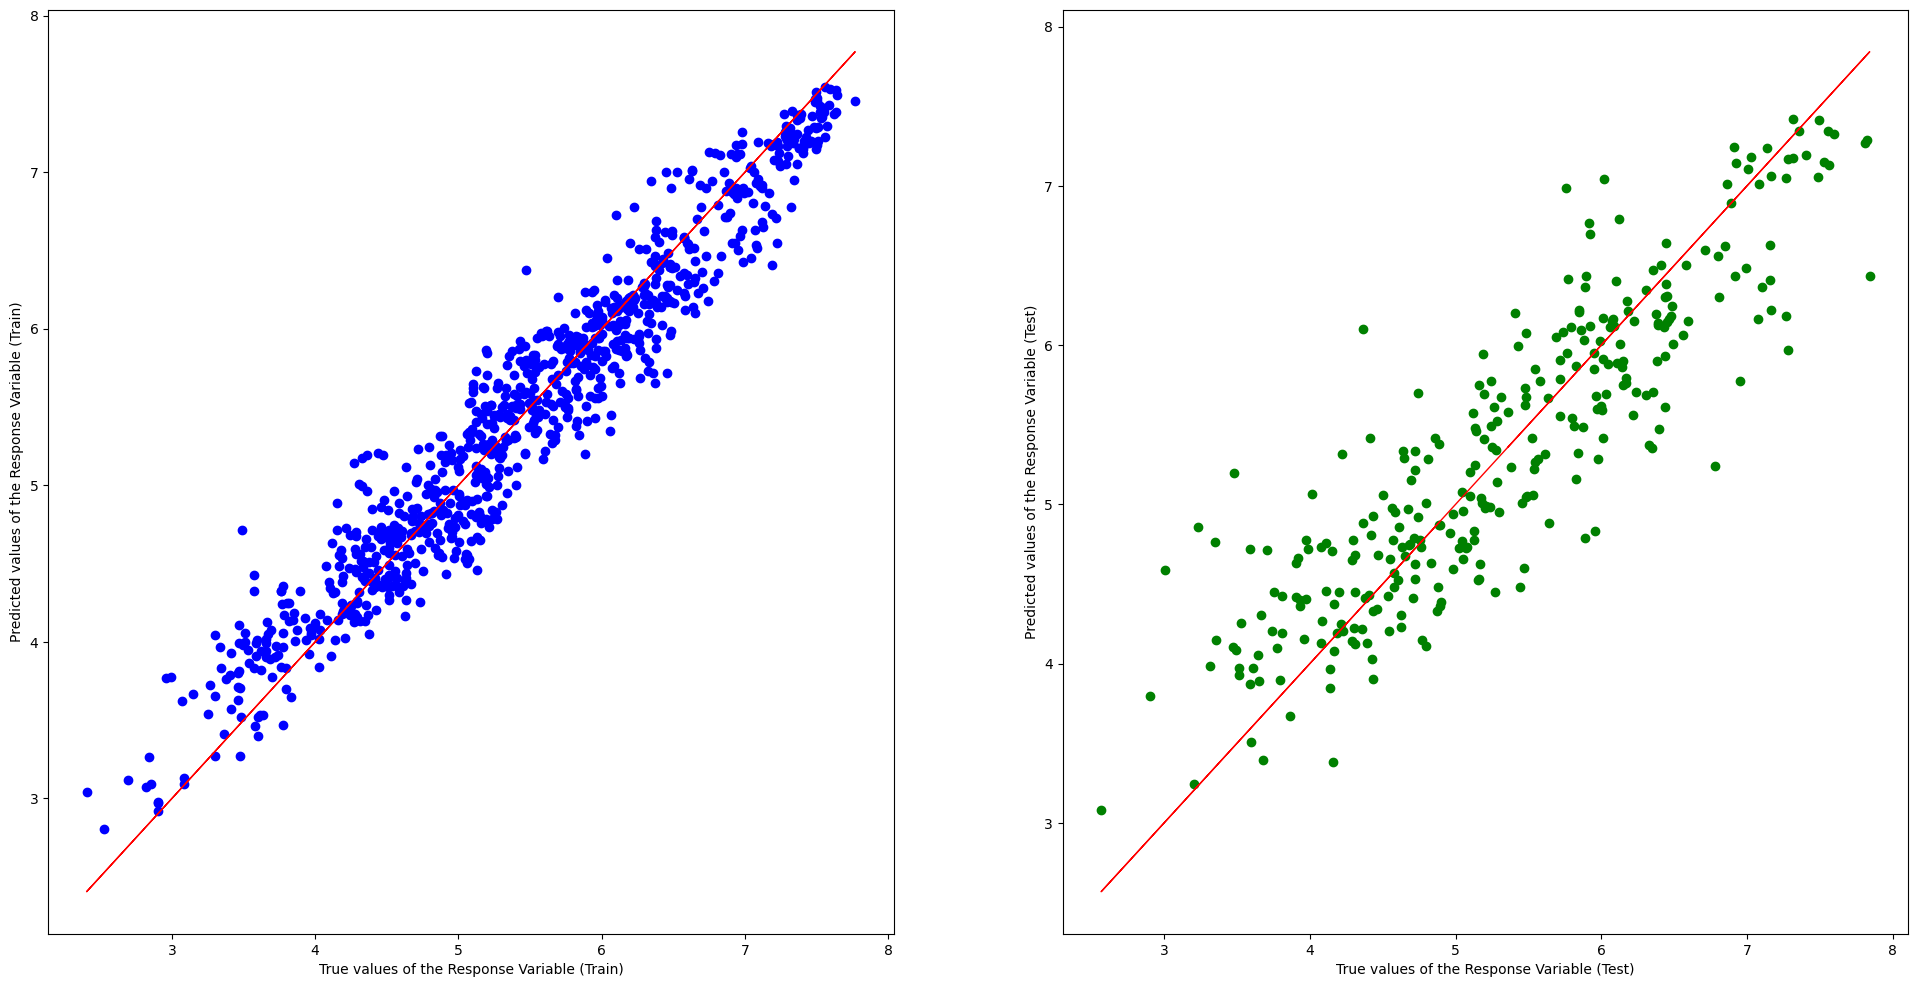

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9347048044303051
Mean Squared Error (MSE) 	: 0.08109899748798345

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7832855334813298
Mean Squared Error (MSE) 	: 0.26702691793310274



In [46]:
# Import essential models and functions from sklearn 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import GridSearchCV 

# Split data into training and testing sets  
X = df_files[['Economy', 'Health', 'Family', 'Freedom']] 
y = df_files['Happiness Score'] 
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) 

# Hyperparameter tuning  
param_grid = { 
    'n_estimators': [50, 100, 200], 
    'max_depth': [5, 10, 20], 
    'min_samples_split': [2, 5, 10] 
} 
 
rf_model = RandomForestRegressor(random_state=42) 
rf_grid = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2) 
rf_grid.fit(X_train, y_train) 
 
print("Best parameters:", rf_grid.best_params_) 
 
# Predict Response corresponding to Predictors
y_train_pred = rf_grid.predict(X_train)
y_test_pred = rf_grid.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train.to_numpy(), y_train.to_numpy(), 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test.to_numpy(), y_test.to_numpy(), 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", rf_grid.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", rf_grid.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

## Random Forest Regression
We used **hyper parameter tuning** in the algorithm by first having a parameter grid that allows for different values for parameters we want to change.  
For example, 'n_estimators': [50, 100, 200] allows for the number of trees in the model at level 1 to take on values such as 50, 100 and 200.  
max_depth (maximum depth of any tree) and min_sample_split (Minimum number of samples required for vertices to be eligible to split, aka become a internal vertex)

We then create a random forest object using random state = 42 (any arbitrary value would work) and used GridSearchCV to cycle through all the possible parameters to find the optimal parameter which minimises the cost function.

The model then takes in the training set to build the model based on the optimal parameters.

## Results of Random Forest Regression
It turned out to be much more accurate as the variance improved from 0.716 in the linear regression model to 0.783 in the random forest regreesion model. An improvement of around 10%. MSE also decreased from 0.339 t0 0.267.

This means that the Random Forest Regression actually is a much better model to predict happiness score although it sacrifices the benefit of intepretabilty found in the linear regression model.

To see whether this model is enough to predict happiness score for 2023, lets try the model for the data recorded in 2023 for Singapore

In [47]:
# This algorithm predicts happiness score for Singapore in 2023
Economy = 2.168
Health = 0.607
Family = 1.354
Freedom = 0.66

sg_2023 = [[Economy, Health, Family, Freedom]]
print("Using Linear Regression,")
print("Expected Happiness Score for Singapore(2023):", linreg.predict(sg_2023),"\n")
print("Using Random Forest Regression,")
print("Expected Happiness Score for Singapore(2023):", rf_grid.predict(sg_2023),"\n")
print("    True Happiness Score for Singapore(2023): 6.587")

Using Linear Regression,
Expected Happiness Score for Singapore(2023): [[7.08470336]] 

Using Random Forest Regression,
Expected Happiness Score for Singapore(2023): [6.42680271] 

    True Happiness Score for Singapore(2023): 6.587


C:\Users\rowan\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

C:\Users\rowan\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



## Final Remarks

As you can see from the two models predictions, the random forest tree in much more accurate in predicting happiness score, being off by only 2.4% as opposed to the linear regression model which is off by 7%.  

Perhaps the model can be improved by considering other factors that are not found in the data we obtained.
Economic factors can include stabilty, cost of living etc which may have different weight as opposed to the general index of "economy" that the data uses.
Political, environmental factors can also come into play as they affect how we feel emotions on a day-to-day basis.
More analysis is needed and the model can be improved to better model happiness in the world.

This model can then be used to target key factors which affect happiness scores in order to boost morale for everyone and to improve mental heath conditions in the world.

We have learnt a lot on data analysis and model building in this project. As a group, we feel that everyone has contributed equally to the final product.
